In [2]:
import pandas as pd
import csv

In [3]:
column_names=['X' , 'Y' , 'Pred_Val']
r15 = pd.read_csv("CSV Files/R15.csv",skiprows=1, header=None, names=column_names )
r15.head(10)

,X,Y,Pred_Val
0,9.802,10.132,1
1,10.350,9.768,1
2,10.098,9.988,1
3,9.730,9.910,1
4,9.754,10.430,1
5,9.836,9.902,1
6,10.238,9.866,1
7,9.530,9.862,1
8,10.154,9.820,1
9,9.336,10.456,1


In [4]:
training_set=r15[r15.columns[0:2]]
training_set.head(10)

,X,Y
0,9.802,10.132
1,10.350,9.768
2,10.098,9.988
3,9.730,9.910
4,9.754,10.430
5,9.836,9.902
6,10.238,9.866
7,9.530,9.862
8,10.154,9.820
9,9.336,10.456


In [5]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn import metrics
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(training_set)


contingency_matrix = metrics.cluster.contingency_matrix(r15['Pred_Val'], pred_y)
purity = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
print("The purity with K=8 is :::: ", purity)


The purity with K=8 is ::::  0.5333333333333333


In [6]:
print("**********************Varying K from 1 to 20 *********************")
import matplotlib.pyplot as plt
k = [None] * 20
purity = [None] * 20
print("K \t Purity")
for x in range(1,20):
    kmeans = KMeans(n_clusters=x, init='k-means++', max_iter=300, n_init=10, random_state=0)
    k[x]= x
    pred_y = kmeans.fit_predict(training_set)
    contingency_matrix = metrics.cluster.contingency_matrix(r15['Pred_Val'], pred_y)
    purity[x] = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    print(k[x] , purity[x] )

plt.plot(k, purity )
plt.xlabel('K')
plt.ylabel('Purity')
plt.title('Effect of K on purity')
plt.show()


**********************Varying K from 1 to 20 *********************
K 	 Purity
1 0.06666666666666667
2 0.13333333333333333
3 0.2
4 0.26666666666666666
5 0.3333333333333333
6 0.4
7 0.4666666666666667
8 0.5333333333333333
9 0.6
10 0.6666666666666666
11 0.7333333333333333
12 0.8
13 0.8666666666666667
14 0.93
15 0.9966666666666667
16 0.9966666666666667
17 0.9966666666666667
18 0.9966666666666667
19 0.995


<Figure size 640x480 with 1 Axes>

In [7]:
jain = pd.read_csv("CSV Files/Jain.csv",skiprows=1, header=None, names=column_names )

training_set=jain[jain.columns[0:2]]
training_set.head(10)

,X,Y
0,0.85,17.45
1,0.75,15.60
2,3.30,15.45
3,5.25,14.20
4,4.90,15.65
5,5.35,15.85
6,5.10,17.90
7,4.60,18.25
8,4.05,18.75
9,3.40,19.70


In [8]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
pred_y = dbscan.fit_predict(training_set)


contingency_matrix = metrics.cluster.contingency_matrix(jain['Pred_Val'], pred_y)
purity = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
print("The purity with DBSCAN is :::: ", purity)


The purity with DBSCAN is ::::  0.739946380697051


**********************Varying min points from 1 to 20*********************
Minpoints 	 Purity
1 0.739946380697051
2 0.739946380697051
3 0.739946380697051
4 0.7426273458445041
5 0.7426273458445041
6 0.8123324396782842
7 0.8150134048257373
8 0.8150134048257373
9 0.8203753351206434
10 0.8203753351206434
11 0.839142091152815
12 0.8418230563002681
13 0.8418230563002681
14 0.8471849865951743
15 1.0
16 0.9946380697050938
17 0.9946380697050938
18 0.9946380697050938
19 0.9946380697050938


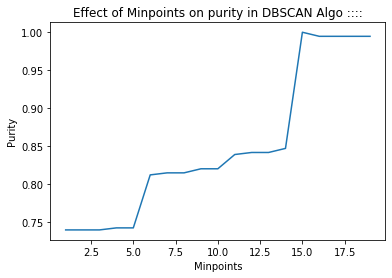

In [9]:
print("**********************Varying min points from 1 to 20*********************")
minpoints = [None] * 20
purity = [None] * 20
print("Minpoints \t Purity")
for x in range(1,20):
    dbscan = DBSCAN(eps=3, min_samples=x)
    minpoints[x]= x
    pred_y = dbscan.fit_predict(training_set)
    contingency_matrix = metrics.cluster.contingency_matrix(jain['Pred_Val'], pred_y)
    purity[x] = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    print(minpoints[x] , purity[x] )

plt.plot(minpoints, purity )
plt.xlabel('Minpoints')
plt.ylabel('Purity')
plt.title('Effect of Minpoints on purity in DBSCAN Algo ::::')
plt.show()

**********************Varying epsillon distance from  from 1 to 20*********************
Epsillon 	 Purity
1 0.9946380697050938
2 1.0
3 0.739946380697051
4 0.739946380697051
5 0.739946380697051
6 0.739946380697051
7 0.739946380697051
8 0.739946380697051
9 0.739946380697051
10 0.739946380697051
11 0.739946380697051
12 0.739946380697051
13 0.739946380697051
14 0.739946380697051
15 0.739946380697051
16 0.739946380697051
17 0.739946380697051
18 0.739946380697051
19 0.739946380697051


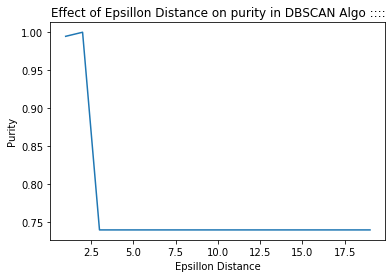

In [10]:
print("**********************Varying epsillon distance from  from 1 to 20*********************")
epsillon = [None] * 20
purity = [None] * 20
print("Epsillon \t Purity")
for x in range(1,20):
    dbscan = DBSCAN(eps=x, min_samples=3)
    epsillon[x]= x
    pred_y = dbscan.fit_predict(training_set)
    contingency_matrix = metrics.cluster.contingency_matrix(jain['Pred_Val'], pred_y)
    purity[x] = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    print(epsillon[x] , purity[x] )

plt.plot(epsillon, purity )
plt.xlabel('Epsillon Distance')
plt.ylabel('Purity')
plt.title('Effect of Epsillon Distance on purity in DBSCAN Algo ::::')
plt.show()